# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

##  1 Carga de librerias, accesos y configuraciones.
___

In [ ]:
# Si requieres instalar una libreria, solo aplica esta sentencia:
#       %pip install <library>.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
sns.set_context("talk")

In [ ]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/1_Datasets
1.1_input_dataset.csv   1.3_clean_dataset.csv    1.5_encoding_dataset.csv
1.2_sample_dataset.csv  1.4_cluster_dataset.csv  1.6_pca_cluster_dataset.csv


In [ ]:
df = pd.read_csv('1.2_sample_dataset.csv', index_col=0)

___
___

## 2 Revisión preliminar
___

In [ ]:
df.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,NaN,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,Scholastic Inc.,4.57,652,28062,2006
1,0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Scholastic Inc.,4.50,870,29770,2004
2,NaN,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Scholastic Inc,4.47,309,75911,2003


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18455 entries, 0 to 18454
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            18174 non-null  object 
 1   Name            18455 non-null  object 
 2   Authors         18455 non-null  object 
 3   Publisher       18302 non-null  object 
 4   Rating          18455 non-null  float64
 5   pagesNumber     18455 non-null  int64  
 6   CountsOfReview  18455 non-null  int64  
 7   PublishYear     18455 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Rating,pagesNumber,CountsOfReview,PublishYear
count,18455.000000,18455.000000,18455.000000,18455.000000
mean,3.927956,329.434950,419.530046,1999.674397
std,0.367937,234.618885,2181.676230,15.893882
min,0.000000,0.000000,0.000000,162.000000
25%,3.770000,196.000000,9.000000,1997.000000
50%,3.960000,292.000000,43.000000,2002.000000
75%,4.130000,400.000000,194.000000,2005.000000
max,5.000000,6576.000000,94850.000000,2020.000000


In [ ]:
df.nunique()/df.shape[0]*100

ISBN              98.076402
Name              98.515308
Authors           42.292062
Publisher         15.908968
Rating             1.246275
pagesNumber        5.960444
CountsOfReview    11.286914
PublishYear        0.514766
dtype: float64

In [ ]:
(df == 0).sum()/df.shape[0]*100

ISBN              0.000000
Name              0.000000
Authors           0.000000
Publisher         0.000000
Rating            0.287185
pagesNumber       0.525603
CountsOfReview    5.250610
PublishYear       0.000000
dtype: float64

>**Primeros hallazgos**.
 
El dataset contiene 18 mil registros y 8 variables y un ID secuencial (que esta sobrando), en cuanto a las variables categóricas muestran:
* Registros nulos en ISBN y Publisher.
* Repetidos en ISBN, hay que retirarlos duplicado por se un Identificador.
* Repetidos en Name, no impacta mucho al no ser un ID.
 
En cuanto a la variables numéricas presentan consistencia al mostrar sólo valores positivos, no obstante:
* El máximo de pagesNumber es mucho mayor que el percentil 75.
* El 5% de countsOfReview son cero.
* La fecha de publicación más antigua es 162, probablemente un error.  



___
___

## 3 Limpieza de los datos
___

### 3.1 Gestión de datos nulos 

In [ ]:
# porcentaje de datos por columna

df.isnull().sum()/df.shape[0]*100

ISBN              1.522623
Name              0.000000
Authors           0.000000
Publisher         0.829044
Rating            0.000000
pagesNumber       0.000000
CountsOfReview    0.000000
PublishYear       0.000000
dtype: float64

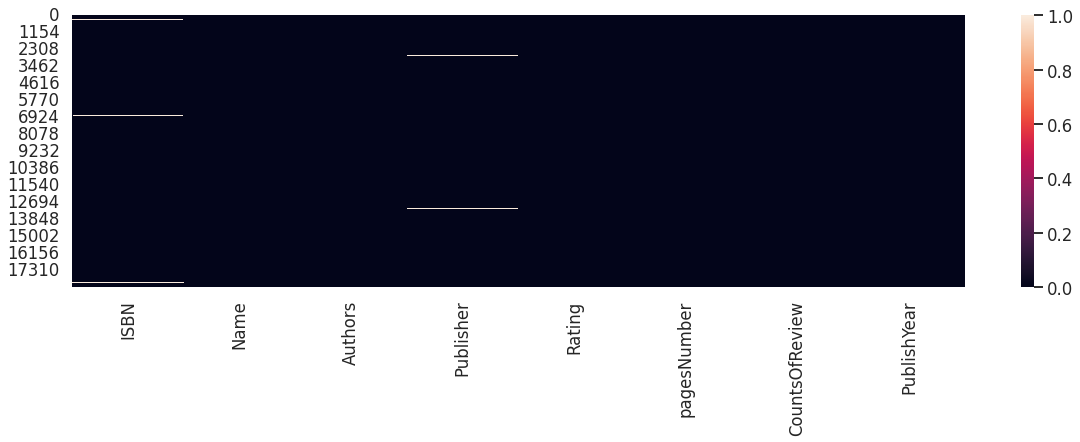

In [ ]:
# Modo gráfico

plt.figure(figsize = (20,5))
sns.set_style("dark")
sns.heatmap(df.isnull())

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18023 entries, 1 to 18454
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            18023 non-null  object 
 1   Name            18023 non-null  object 
 2   Authors         18023 non-null  object 
 3   Publisher       18023 non-null  object 
 4   Rating          18023 non-null  float64
 5   pagesNumber     18023 non-null  int64  
 6   CountsOfReview  18023 non-null  int64  
 7   PublishYear     18023 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.2+ MB


> El dataset conserva 98% de los registros sin los registros nulos.

### 3.2 Gestión de datos duplicados

In [ ]:
df[df['ISBN'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 14494 to 16273
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            71 non-null     object 
 1   Name            71 non-null     object 
 2   Authors         71 non-null     object 
 3   Publisher       71 non-null     object 
 4   Rating          71 non-null     float64
 5   pagesNumber     71 non-null     int64  
 6   CountsOfReview  71 non-null     int64  
 7   PublishYear     71 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.0+ KB


In [ ]:
df.drop(df[df['ISBN'].duplicated()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17952 entries, 1 to 18454
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            17952 non-null  object 
 1   Name            17952 non-null  object 
 2   Authors         17952 non-null  object 
 3   Publisher       17952 non-null  object 
 4   Rating          17952 non-null  float64
 5   pagesNumber     17952 non-null  int64  
 6   CountsOfReview  17952 non-null  int64  
 7   PublishYear     17952 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.nunique()/df.shape[0]*100

ISBN              100.000000
Name               98.969474
Authors            42.964572
Publisher          16.165330
Rating              1.281194
pagesNumber         6.016043
CountsOfReview     11.235517
PublishYear         0.529189
dtype: float64

> El dataset conserva 97% de los registros sin los registros repetidos (y nulos).

### 2.4 Atípicos

In [ ]:
# Se elimina el dato con fecha de publicación "162"

df.drop(df[df['PublishYear'] == 162].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


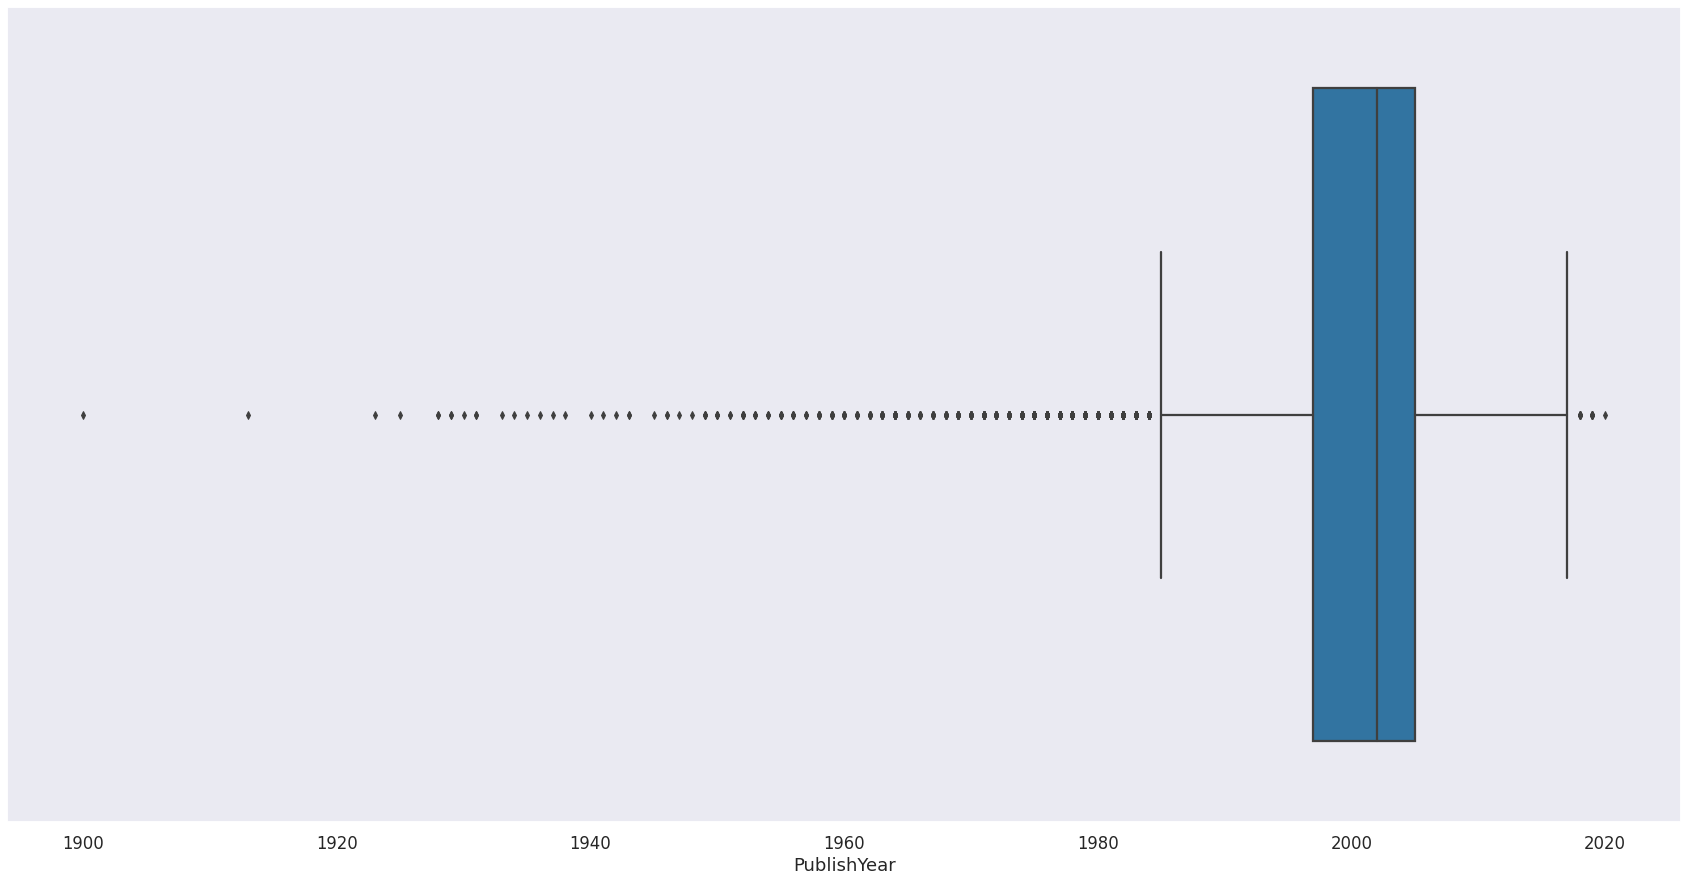

In [ ]:
plt.figure(figsize = (30,15))
sns.boxplot(df['PublishYear'])

In [ ]:
Q1 = df['PublishYear'].quantile(0.25)
Q3 = df['PublishYear'].quantile(0.75)
IQR = Q3 - Q1

mask = (df['PublishYear'] < (Q1 - 1.5 * IQR)) | (df['PublishYear'] > (Q3 + 1.5 * IQR))
df[mask].shape[0]

943

In [ ]:
num_df = df[list(df.columns[df.dtypes != object])]

for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[f'flag_{col}'] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17951 entries, 1 to 18454
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 17951 non-null  object 
 1   Name                 17951 non-null  object 
 2   Authors              17951 non-null  object 
 3   Publisher            17951 non-null  object 
 4   Rating               17951 non-null  float64
 5   pagesNumber          17951 non-null  int64  
 6   CountsOfReview       17951 non-null  int64  
 7   PublishYear          17951 non-null  int64  
 8   flag_Rating          17951 non-null  bool   
 9   flag_pagesNumber     17951 non-null  bool   
 10  flag_CountsOfReview  17951 non-null  bool   
 11  flag_PublishYear     17951 non-null  bool   
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 1.3+ MB


In [ ]:
ind_out = df[df['flag_PublishYear']].index
df.drop(ind_out, inplace=True)
df.shape

(17008, 12)

In [ ]:
ind_out = df[df['flag_pagesNumber']].index
df.drop(ind_out, inplace=True)
df.shape

(16160, 12)

In [ ]:
ind_out = df[df['flag_CountsOfReview']].index
df.drop(ind_out, inplace=True)
df.shape

(13818, 12)

In [ ]:
ind_out = df[df['flag_Rating']].index
df.drop(ind_out, inplace=True)
df.shape


(13405, 12)

In [ ]:
df = df.drop(columns=['flag_PublishYear', 'flag_pagesNumber', 'flag_CountsOfReview', 'flag_Rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13405 entries, 3 to 18454
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            13405 non-null  object 
 1   Name            13405 non-null  object 
 2   Authors         13405 non-null  object 
 3   Publisher       13405 non-null  object 
 4   Rating          13405 non-null  float64
 5   pagesNumber     13405 non-null  int64  
 6   CountsOfReview  13405 non-null  int64  
 7   PublishYear     13405 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 942.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


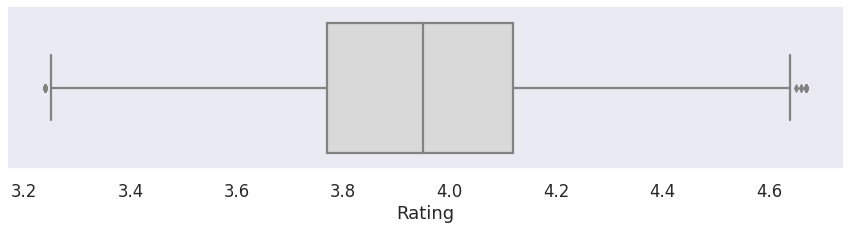

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(df['Rating'], color='0.85')

In [ ]:
df = df.reset_index(drop=True)
df.to_csv('1.3_clean_dataset.csv')

___
___